In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import cv2
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Dataset_New.zip'
import zipfile
!unzip /content/drive/MyDrive/Dataset_New.zip

In [ ]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
import os
f_candidiasis_oral = os.path.join('/content/Dataset_New/Candidiasis_Oral')
f_candidiasis_vital = os.path.join('/content/Dataset_New/Candidiasis_Vital')
f_jock = os.path.join('/content/Dataset_New/Jock_Itch')
f_ringworm = os.path.join('/content/Dataset_New/Ringworm')
f_scabies = os.path.join('/content/Dataset_New/Scabies')
f_tinea_pedis = os.path.join('/content/Dataset_New/Tinea_Pedis')
f_tinea_versicolor = os.path.join('/content/Dataset_New/Tinea_Versicolor')

print('Jumlah gambar Candidiasis Oral :', len(os.listdir(f_candidiasis_oral)))
print('Jumlah gambar Candidiasis Vital:', len(os.listdir(f_candidiasis_vital)))
print('Jumlah gambar Jock Itch :', len(os.listdir(f_jock)))
print('Jumlah gambar Ringworm :', len(os.listdir(f_ringworm)))
print('Jumlah gambar Scabies :', len(os.listdir(f_scabies)))
print('Jumlah gambar Tinea Pedis :', len(os.listdir(f_tinea_pedis)))
print('Jumlah gambar Tinea Versicolor :', len(os.listdir(f_tinea_versicolor)))

file_Candidiasis = os.listdir(f_candidiasis_oral)
print("Candidiasis Oral :",file_Candidiasis[:5])

file_Candidiasis = os.listdir(f_candidiasis_vital)
print("Candidiasis Vital :",file_Candidiasis[:5])

file_Jock = os.listdir(f_jock)
print("Jock Itch :",file_Jock[:5])

file_Ringworm = os.listdir(f_ringworm)
print("Ringworm :",file_Ringworm[:5])

file_Scabies = os.listdir(f_scabies)
print("Scabies :",file_Scabies[:5])

file_Tinea_Pedis = os.listdir(f_tinea_pedis)
print("Tinea Pedis :",file_Tinea_Pedis[:5])

file_Tinea_Versicolor = os.listdir(f_tinea_versicolor)
print("Tinea Versicolor :",file_Tinea_Versicolor[:5])

Jumlah gambar Candidiasis Oral : 20
Jumlah gambar Candidiasis Vital: 20
Jumlah gambar Jock Itch : 20
Jumlah gambar Ringworm : 20
Jumlah gambar Scabies : 20
Jumlah gambar Tinea Pedis : 20
Jumlah gambar Tinea Versicolor : 20
Candidiasis Oral : ['KK_11.jpg', 'KK_40.jpg', 'KK_4.jpg', 'KK_44.jpg', 'KK_5.jpg']
Candidiasis Vital : ['K_2.jpg', 'K_8.jpg', 'K_10.jpg', 't-candidiasis-diaper-29.jpg', 'K_1.jpg']
Jock Itch : ['JI_35.jpg', 'Jl_52.jpg', 'JI_21.jpg', 'Jl_45.jpg', 'Jl_57.jpg']
Ringworm : ['Kurap_37.jpg', 'Kurap_12.jpg', 'Kurap_44.jpg', 'Kurap_1.jpg', 'Kurap_51.jpg']
Scabies : ['Skabies_44.jpg', 'Skabies_11.jpg', 'Skabies_1.jpg', 'Skabies_71.jpg', 'Skabies_22.jpg']
Tinea Pedis : ['TP_15.jpg', 'TP_10.jpg', 'TP_75.jpg', 'TP_8.jpg', 'TP_45.jpg']
Tinea Versicolor : ['Panu_62.jpg', 'Panu_8.jpg', 'Panu_47.jpg', 'Panu_2.jpg', 'Panu_63.jpg']


In [ ]:
base_dir = '/content/Dataset_New/'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
train_generator = training_datagen.flow_from_directory(
    base_dir,
    target_size=(180, 180),
    class_mode='categorical',
    batch_size=8,
    subset='training'
)

validation_generator = training_datagen.flow_from_directory(
    base_dir,
    target_size=(180, 180),
    class_mode='categorical',
    batch_size=8,
    subset='validation'
)

Found 112 images belonging to 7 classes.
Found 28 images belonging to 7 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(8, 180, 180, 3)
(8, 7)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
model = models.Sequential([
        layers.Conv2D(32, (5,5), activation='relu', padding='same', input_shape = (180, 180, 3)),
        layers.MaxPooling2D(pool_size=(2,2), padding='same'),
        layers.Conv2D(64, (5,5), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2), padding='same'),
        layers.Conv2D(128, (5,5), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2), padding='same'),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(7, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 180, 180, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 128)       204928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 67712)            

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epochs_end(self, epochs, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\The Training is Stop, Model Accuracy is > 90%")
      self.model.stop_training = True,
      monitor='val_loss',
      mode='auto',
      verbose=0

callbacks = myCallback()

In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 200,
    callbacks=myCallback()
)

Epoch 1/200
14/14 [==============================] - 3s 166ms/step - loss: 2.1471 - accuracy: 0.1250 - val_loss: 1.9455 - val_accuracy: 0.1786
Epoch 2/200
14/14 [==============================] - 2s 145ms/step - loss: 1.9482 - accuracy: 0.1250 - val_loss: 1.9445 - val_accuracy: 0.1429
Epoch 3/200
14/14 [==============================] - 2s 146ms/step - loss: 1.9443 - accuracy: 0.1161 - val_loss: 1.9327 - val_accuracy: 0.1429
Epoch 4/200
14/14 [==============================] - 2s 145ms/step - loss: 1.9205 - accuracy: 0.1429 - val_loss: 1.9006 - val_accuracy: 0.1786
Epoch 5/200
14/14 [==============================] - 2s 146ms/step - loss: 1.9070 - accuracy: 0.2679 - val_loss: 1.9503 - val_accuracy: 0.1429
Epoch 6/200
14/14 [==============================] - 2s 145ms/step - loss: 1.8983 - accuracy: 0.1875 - val_loss: 2.0864 - val_accuracy: 0.1071
Epoch 7/200
14/14 [==============================] - 2s 144ms/step - loss: 1.8487 - accuracy: 0.2500 - val_loss: 1.9022 - val_accuracy: 0.1786

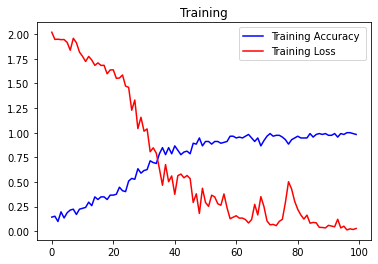

<Figure size 432x288 with 0 Axes>

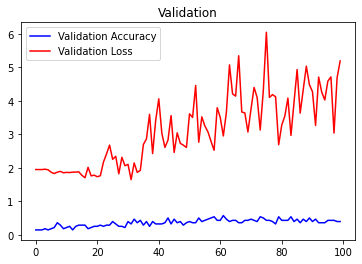

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy ')
plt.plot(epochs, loss, 'r', label='Training Loss ')
plt.title('Training')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Validation')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(180,180))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=7)
  print(fn)
  if classes[0][0]==1:
    print('Candidiasis Oral')
  elif classes[0][1]==1:
    print('Candidiasis Vital')
  elif classes[0][2]==1:
    print('Jock Itch')
  elif classes[0][3]==1:
    print('Ringworm')
  elif classes[0][4]==1:
    print('Scabies')
  elif classes[0][5]==1:
    print('Tinea Pedis')
  elif classes[0][6]==1:
    print('Tinea Versicolor')
  else:
    print('Unknown')